## 데이터셋
- 원본 : UCI Machine Learning Repository

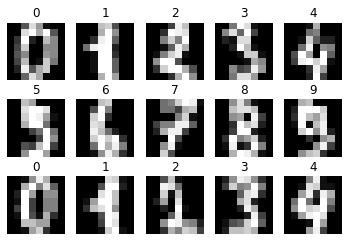

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis('off')
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap='gray')

plt.show()

### 이미지 형식
- 0 : 검은색
- 16 : 흰색

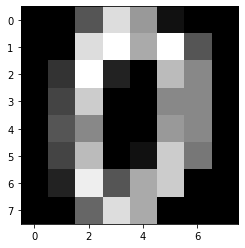

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [2]:
d0 = digits.images[0]
plt.imshow(d0, cmap='gray')
plt.show()
print(d0)

## 이미지 머신러닝

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = digits.images
y = digits.target
print('변환 전 x.shape :', x.shape)
x = x.reshape((-1, 64)) # 1차원 배열로 변환
print('변환 후 x.shape :', x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 데이터 학습
clf = LinearSVC()
clf.fit(x_train, y_train)

# 예측
y_pred = clf.predict(x_test)
print('정확도 :', accuracy_score(y_test, y_pred))

변환 전 x.shape : (1797, 8, 8)
변환 후 x.shape : (1797, 64)
정확도 : 0.9722222222222222


C:\Users\master\anaconda3\envs\multi\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 학습 데이터 저장

In [7]:
import joblib
joblib.dump(clf, '../models/digits.pkl')

['../models/digits.pkl']

### 학습 데이터 로드

In [8]:
clf = joblib.load('../models/digits.pkl')

## 자신이 작성한 이미지 판별

In [9]:
import cv2
import joblib

def predict_digit(filename):
    # 학습한 데이터 불러오기
    clf = joblib.load('../models/digits.pkl')
    
    # 직접 그린 손글씨 이미지 불러오기
    my_img = cv2.imread(filename)
    
    # 학습에 적합하게 변환
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
    
    # 2차원에서 1차원 배열로 변환
    my_img = my_img.reshape((-1, 64))
    
    # 데이터 예측
    res = clf.predict(my_img)
    return res[0]

In [12]:
file1 = '../datasets/my2.png'
file2 = '../datasets/my4.png'

n1 = predict_digit(file1)
print(file1[-7:], '=', n1)

n2 = predict_digit(file2)
print(file2[-7:], '=', n2)

my2.png = 2
my4.png = 4
